# 600_RQ3A

# _Question Three: Does Location Impact Road Safety?_

## _(A): Is it safer to drive in urban or rural areas?_
We return to part A of our third research question in this notebook and conclude whether or not it is safer to drive in urban or rural areas. The data used to answer this question ranges between the years 1999 - 2014.

## Notebook Contents:
* __1:__ Some Matplotlib Configuration

* __2:__ Loading the Data

* __3:__ Are there more accidents in rural or urban areas?

* __4:__ Are accidents more or less severe in urban or rural areas?
      
* __5:__ On average, are there more casualties in accidents in urban or rural areas?

* __6:__ Which urban and rural areas have the most number of casualties?

* __7:__ Average number of casualties in urban and rural areas over the years

* __8:__ Conclusions: Is it safer to drive un urban or rural areas?

## Datasets

__Input:__
* 600_Analysis_Q3A_norm_urban_rural_groups.pkl   (Data for urban and rural groups)
* 600_Analysis_Q3A_norm_All_Urban_Rural_Accident_Severity_groups.pkl   (Accident severity in urban and rural groups)
* 600_Analysis_Q3A_All_Urban_Rural_Num_Casualties.pkl   (Average number of casualties in urban and rural areas)
* 900_Q3A_final_prep_1.pkl    (Data needed for Q3A for years 1979-2004)
* 900_Q3A_final_prep_2.pkl    (Data needed for Q3A for years 2005-2014)

__Output:__ n/a

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import gmplot

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

% matplotlib inline

C:\Users\Ciara\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1. Some Matplotlib Configuration

Below we have included some formatting which we want each of our plots to follow.

This template has been taken from Barry's Valencia Results Notebooks.

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, lines, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 10

# 2. Loading the Data

In [3]:
urban_rural_groups = pd.read_pickle('../../data/analysis/600_Analysis_Q3A_norm_urban_rural_groups.pkl')
urban_rural_groups.shape

(2, 1)

In [4]:
urban_rural_accident_severity= pd.read_pickle('../../data/analysis/600_Analysis_Q3A_norm_All_Urban_Rural_Accident_Severity_groups.pkl')
urban_rural_accident_severity.shape

(2, 3)

In [5]:
urban_rural_num_casualties= pd.read_pickle('../../data/analysis/600_Analysis_Q3A_All_Urban_Rural_Num_Casualties.pkl')
urban_rural_num_casualties.shape

(2, 1)

In [6]:
Q3A_1 = pd.read_pickle('../../data/processed/900_Q3A_final_prep_1.pkl')
Q3A_1.shape

(2290760, 19)

In [7]:
Q3A_2 = pd.read_pickle('../../data/processed/900_Q3A_final_prep_2.pkl')
Q3A_2.shape

(2810328, 19)

# 3. Are there more accidents in rural or urban areas?

The following visualisation shows the comparison between the number of accidents in rural and urban areas in terms of a %.

The graph clearly shows that there are more accidents in urban areas with urban areas having roughly 63% and rural areas having roughly 36%.

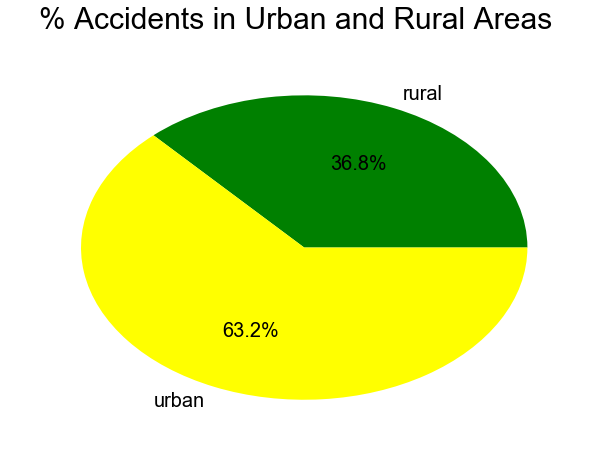

In [8]:
urban_rural_groups.plot.pie(y='Accident_Count', autopct='%1.1f%%', figsize=(10,7), colors=['green', 'yellow'], fontsize=20, legend=False)
plt.axis('off')
plt.suptitle('% Accidents in Urban and Rural Areas', fontsize=30)
plt.show()

# 4. Are accidents more or less severe in urban or rural areas?

The graph below illustrates the % of 'fatal', 'serious' and 'slight' accidents in urban and rural areas.

You can see that in both areas there are much more slightly severe accidents however, there are more fatal and serious accidents in rural areas.

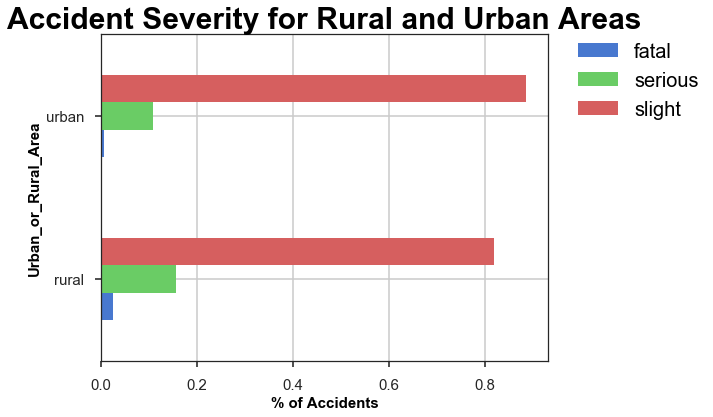

In [9]:
urban_rural_accident_severity.plot(kind='barh', figsize=(8,6))
plt.xlabel('% of Accidents')
plt.title('Accident Severity for Rural and Urban Areas', fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# 5. On average, are there more casualties in accidents in urban or rural areas?

The following graph shows the average number of casualties in accidents in urban and rural areas.

The graph shows that in fact on average there are more casualties in a road accident in rural areas with roughly 1.6 casualties per accident in rural areas compared to roughly 1.3 in urban areas.

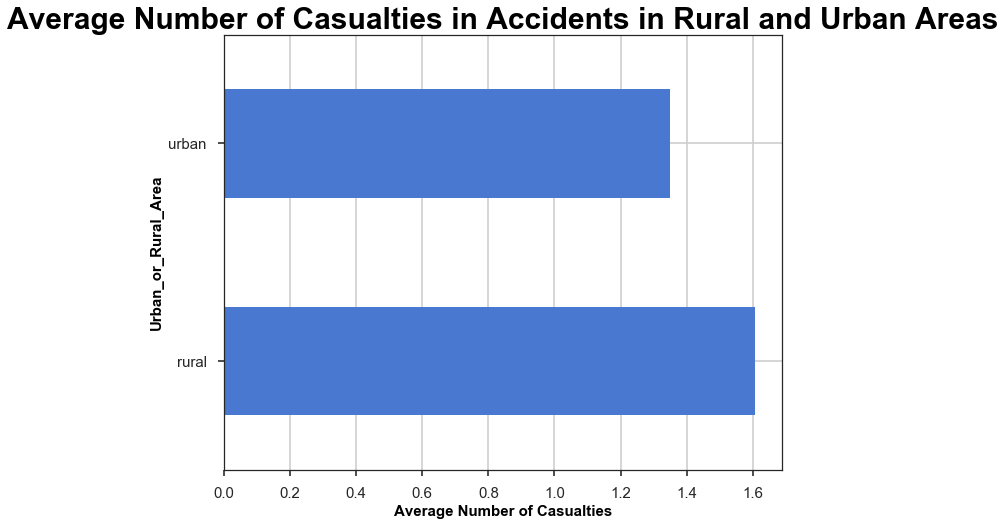

In [10]:
urban_rural_num_casualties.plot(kind='barh', figsize=(10,8), legend=False)
plt.xlabel('Average Number of Casualties')
plt.title('Average Number of Casualties in Accidents in Rural and Urban Areas', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# 6. Which urban and rural areas have the most number of casualties?

Here we will specifically look at which urban and rural areas have the highest number of casualties. To do this we will sort all of the data in descending order and look at the top 5,000 rows. We will then group it by 'Urban_or_Rural_Area' and use the longitude and latitude coordinates to plot them on a map visualisation. We expect that given the avergae number of casualties in higher in rural areas there will be more rural points on the map visualisation than urban areas.

In [11]:
All_Urban_Rural = pd.concat([Q3A_1,Q3A_2]) # Concatenating both dataframes to get all of the urban and rural data together

In [12]:
sorted_urban_rural_xy = All_Urban_Rural.sort_values(by='Number_of_Casualties', ascending=False) 

In [13]:
max_5000_casualties_areas = sorted_urban_rural_xy.head(5000)

In [14]:
max_5000_groups = max_5000_casualties_areas.groupby('Urban_or_Rural_Area')

In [15]:
max_5000_urban = max_5000_groups.get_group('urban')
max_5000_rural = max_5000_groups.get_group('rural')

In [16]:
max_5000_urban.size

30191

In [17]:
max_5000_rural.size

64809

In [18]:
max_5000_urban_Longitude = max_5000_urban['Longitude']
max_5000_urban_Latitude = max_5000_urban['Latitude']
max_5000_rural_Longitude = max_5000_rural['Longitude']
max_5000_rural_Latitude = max_5000_rural['Latitude']

In [19]:
# Here we will use gmplot to plot the longitude and Latitude data on a map of the UK

gmap = gmplot.GoogleMapPlotter(55.3781,-3.4360, 6)  # this uses the coordinates of the UK to create a map of the UK

gmap.scatter(max_5000_urban_Latitude.values, max_5000_urban_Longitude.values, 'indigo', size=4000, marker=False)
gmap.scatter(max_5000_rural_Latitude.values, max_5000_rural_Longitude.values, 'deeppink', size=4000, marker=False)

gmap.draw("max_5000_urb_rur_scatter.html")

# 7. Average number of casualties in urban and rural areas over the years
Next, we will plot the average number of casualties in Urban and Rural areas over the years (1999-2014) to determine whether or not the average number of casualties in a raoad accident decreases over time.

In [20]:
year_casualties_1 = Q3A_1.groupby(['Year', 'Urban_or_Rural_Area'])[['Number_of_Casualties']].mean()
year_casualties_2 = Q3A_2.groupby(['Year', 'Urban_or_Rural_Area'])[['Number_of_Casualties']].mean()
All_year_casualties = pd.concat([year_casualties_1, year_casualties_2]).unstack()
All_year_casualties

Number_of_Casualties          
Urban_or_Rural_Area                rural     urban
Year                                              
1999                            1.624981  1.347426
2000                            1.623413  1.366300
2001                            1.632552  1.361684
2002                            1.613135  1.360018
2003                            1.612693  1.346553
2004                            1.592628  1.342174
2005                            1.608542  1.349121
2006                            1.605621  1.353086
2007                            1.597501  1.352190
2008                            1.580947  1.353731
2009                            1.597134  1.355983
2010                            1.585071  1.354079
2011                            1.622185  1.347850
2012                            1.589081  1.345161
2013                            1.621429  1.320637
2014                            1.582878  1.325890

You can see from the graph below that in certain years there is a decline in the average number of casualties in both urban and rural areas. However, there is not a big enough difference to say that there was a significant improvement.

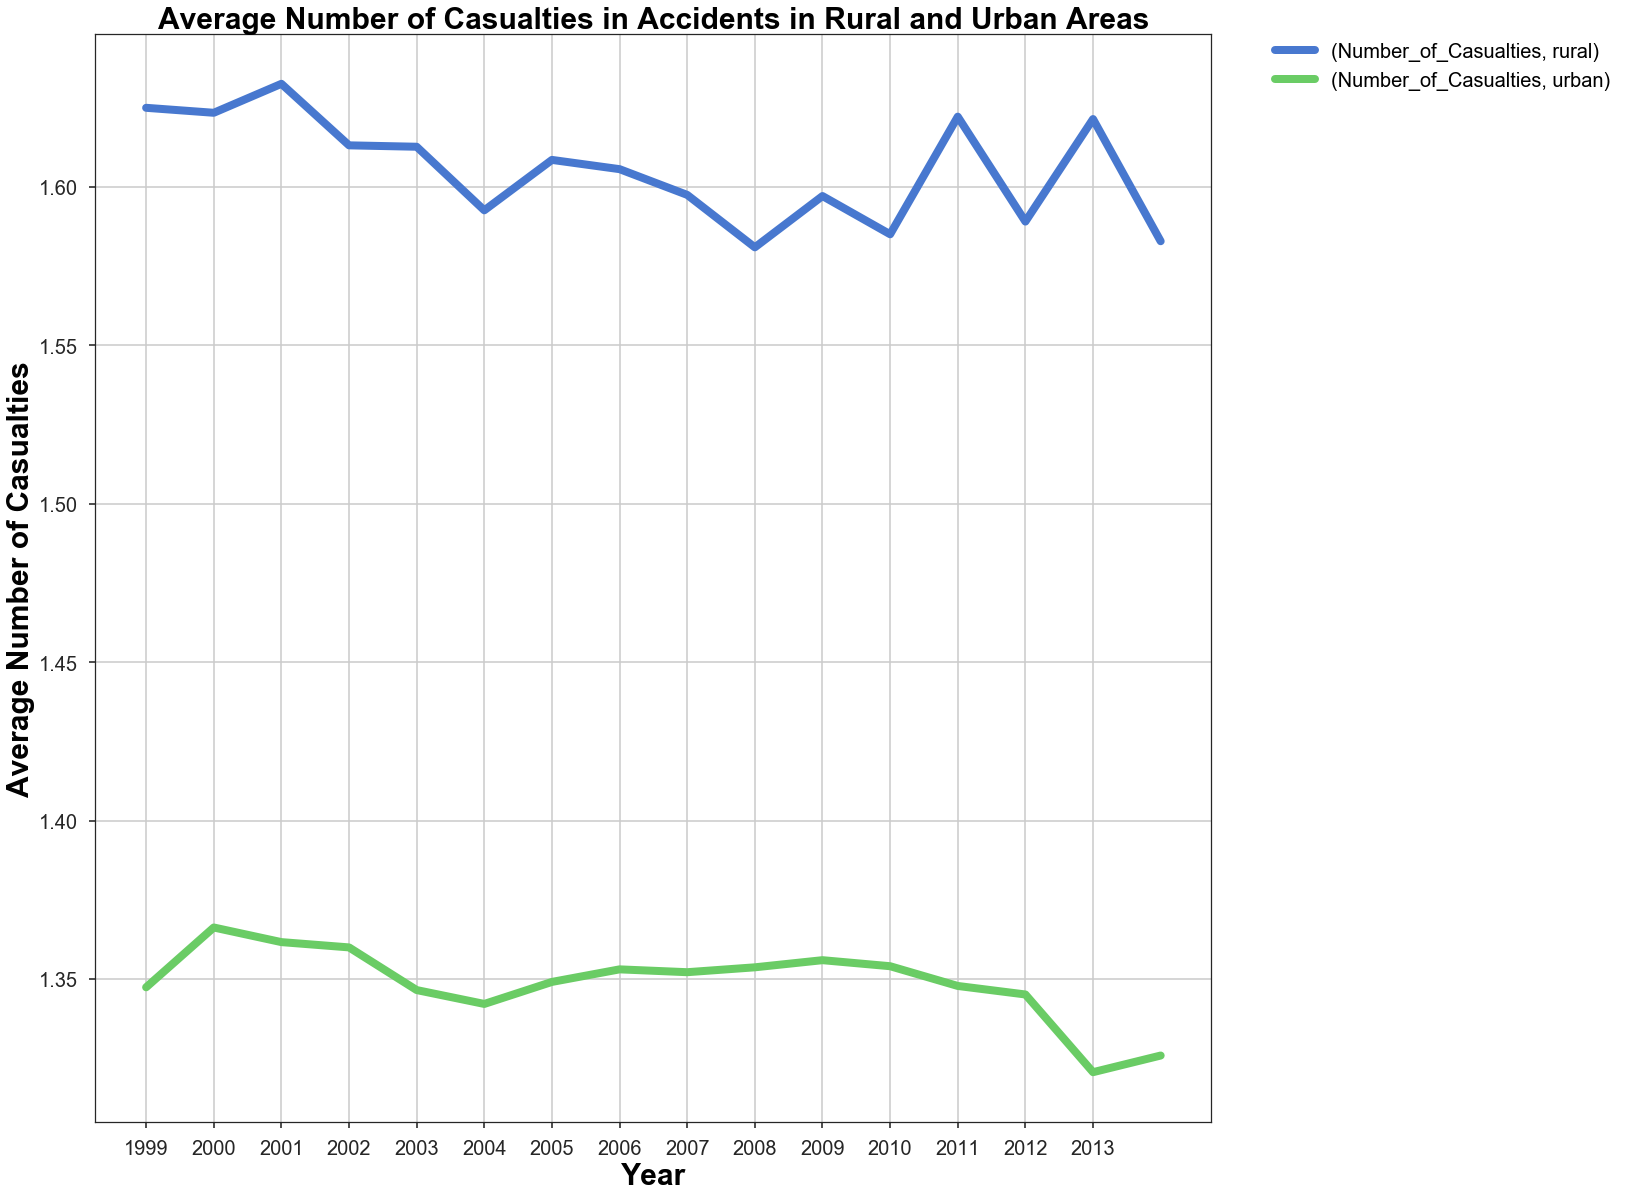

In [21]:
All_year_casualties.plot(kind='line',figsize=(20,20), linewidth=8)
plt.ylabel('Average Number of Casualties', fontsize=30)
plt.xlabel('Year', fontsize=30)
plt.title('Average Number of Casualties in Accidents in Rural and Urban Areas', fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.xticks(np.arange(15), ('1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'), fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# 8. Conclusions: Is it safer to drive in urban or rural areas?

* We can conclude that in fact there are more accidents in urban areas than rural areas.  We found that pproximately 63% of UK road accidents happen in urban areas in comparison to about 36% in rural areas. We suspect that this large difference is due to the high population density in urban areas. From this the data indicates that it is safer to drive in rural areas.
* However, we were interested to find that road accidents in rural areas had a higher % of severe and fatal outcomes than accidents in urban areas suggesting it is safer to drive in urban areas than rural areas.
* On average, we can conclude that road accidents in rural areas have a higher number of casualties when compared to urban areas. This again leads us to believe that it is safer to drive in urban areas. Additionally, we found that the average number of casualties in accidents in both urban and rural areas declines in specific years between 1993 and 2016 but not enough to conclude that there is a significant improvement in either area.